This work is licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/.

## 🧭 Obiettivo dell'analisi

Identificare la categoria ottimale per sviluppare una app a tema sostenibilità su Google Play, 
basandosi su dati reali (rating, numero di recensioni, installazioni, concorrenza, tipologia, prezzo...).

---

## 📊 EDA per App Store Data

1. **Esplorazione del dataset**
   - `df.head()`, `df.info()`, `df.isnull()`
   - Comprendere le dimensioni e i tipi di dati
   - Capire come sono strutturate le colonne: `Category`, `Rating`, `Reviews`, `Installs`, `Type`, `Price`, ecc.


2. **Pulizia dei dati**
   - Conversione di `Installs`, `Price`, `Reviews` in numerico
   - Rimozione o imputazione dei valori mancanti
   - Gestione dei duplicati
   - Rimozione delle colonne non necessarie


3. **Analisi univariata**
   - Distribuzione di:
     - `Rating`, `Price`, `Size MB`
     - Tipi di app (Free vs Paid)
     - Conteggio per `Category`
     - `Sotto categorie`, `Content Rating`, `Last Update`


4. **Analisi bivariata e multivariata**
   - `Heatmap` fra `Rating`, `Reviews`, `Installs`, `Price_$`, `Size_MB`
   - `Scatterplot` fra `Installs` e `Reviews`
   - `Scatterplot` fra `Rating` e `Installs`
   - `Scatterplot` fra `Price_$(Paid)` e `Installs`
   - `Barplot` fra `Reviews Mean` e `Category`


5. **Analisi competitiva per categoria**
   - Media rating per categoria
   - Numero medio di installazioni per categoria
   - Varianza delle istallazioni per categoria
   - Matrice fra App, Rating medio, Installazioni medie e Istallazioni varianza


6.  **Clustering K-Means**
   - Preparazione dei dati per il clustering
   - Normalizzazione (fondamentale perché le scale delle variabili sono diverse)
   - Scelta ottimale del numero di cluster (k)
   - Applicazione di K-Means
   - Visualizzazione ed interpretazione 


7. **Sintesi e strategia finale**
   - Obbiettivi Strategici
   - Conclusione Pratica


# 📁 Struttura Dataset

## 🔹 df – Dataset principale sulle app

Questo dataset contiene le informazioni generali su ogni app e le sue metriche di base.

* **App** – Nome dell'app.
* **Category** – Categoria a cui appartiene l'app.
* **Rating** – Valutazione media degli utenti (numerica).
* **Reviews** – Numero di recensioni (numerico).
* **Size** – Dimensione dell'app (stringa, da convertire).
* **Installs** – Numero di installazioni (stringa formattata, da convertire in numerico).
* **Type** – Indica se l'app è `Free` o `Paid`.
* **Price** – Prezzo in dollari (stringa, da convertire in numerico).
* **Genres** – Uno o più generi di appartenenza (es. "Art & Design;Creativity").
* **Content Rating** – Fascia d'età consigliata.
* **Last Updated, Current Ver, Android Ver** – Informazioni aggiuntive su versioni e date, non essenziali per l'analisi attuale.

---

## 🔹 df_reviews – Recensioni testuali con sentiment

Questo dataset contiene le recensioni degli utenti, analizzate per il loro contenuto emotivo.

* **App** – Nome dell'app, usato per collegare questo dataset con il DataFrame principale (`df`).
* **Translated_Review** – Testo della recensione tradotto in inglese.
* **Sentiment** – Classificazione del sentimento (`Positive`, `Neutral`, `Negative`).
* **Sentiment_Polarity** – Un valore numerico tra -1 (molto negativo) e 1 (molto positivo).
* **Sentiment_Subjectivity** – Un valore tra 0 (completamente oggettivo) e 1 (completamente soggettivo).

In [56]:
# Importo le librerie
import pandas as pd
import numpy as np


In [57]:
# Importo i DataSet
df = pd.read_csv('googleplaystore.csv')
df_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [58]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.min_rows', 1000)

## 1. Esplorazione DataSet

In [59]:
# Dimensioni DataFrame
print(df.shape)
print(df_reviews.shape)

(10841, 13)
(64295, 5)


In [60]:
# Visualizzazione prime righe
display(df.head())
display(df_reviews.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [61]:
# Visualizzazione ultime righe
display(df.tail())
display(df_reviews.tail())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [62]:
# Informazioni generali dei due DataFrame
df.info()
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

In [63]:
# Controllo valori nulli
null_counts = df.isnull().sum()
null_counts_reviews = df_reviews.isnull().sum()
print("Valori nulli:\n", null_counts)

Valori nulli:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [64]:
print("Valori nulli:\n", null_counts_reviews)

Valori nulli:
 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [65]:
# Valori unici in df
df['App'].nunique()

9660

In [66]:
"""
DECIDO DI ESCLUDERE df_reviews dall'analisi perchè rappresentano soltanto 1074 App rispetto a df in cui sono rappresentate 8181 App
"""
# Valori unici in df_reviews 
df_reviews['App'].nunique()

1074

In [67]:
# Verifico duplicati in df
print("\nRighe duplicate:", df.duplicated().sum())


Righe duplicate: 483


## 2. Pulizia dei dati

In [68]:
# Converto in numerico la colonna Installs e rimuovo il simbolo +
df['Installs'] = df['Installs'].str.replace('[+,]','',regex=True)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [69]:
# Converto in numeico la colonna Price e rimuovo il simbolo $
df['Price'] = df['Price'].str.replace('[$,]','',regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [70]:
# Converto Reviews in numerico
df['Reviews'] = pd.to_numeric(df['Reviews'], errors = 'coerce')

In [71]:
# Rimuovo Le App senza nome o categoria
df = df.dropna(subset=['App','Category'])

# Rimovo le righe con valori di Rating errato
df = df[df['Rating'] <= 5]

# Rimuovo le righe duplicate
df = df.drop_duplicates()

In [72]:
# Converto Last Update in datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [73]:
# Eventuali valori nulli post-conversione
print("Valori nulli in 'Last Updated':", df['Last Updated'].isnull().sum())

Valori nulli in 'Last Updated': 0


In [74]:
# Rimuovo i caratteri 'M' e 'k' dalla colonna size e la converto in numerico

# Step 1: Sostituisci "Varies with device" con NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

# Step 2: Rimuovi "M" e "k", mantieni il numero e il moltiplicatore
def size_to_mb(size_str):
    if pd.isnull(size_str):
        return np.nan
    elif size_str.endswith('M'):
        return float(size_str[:-1])
    elif size_str.endswith('k'):
        return float(size_str[:-1]) / 1024  # da kB a MB
    else:
        return np.nan

# Step 3: Applica la funzione
df['Size_MB'] = df['Size'].apply(size_to_mb)

In [75]:
# Controllo conversione
df[['Size', 'Size_MB']].head(10)

print("Valori nulli nella nuova colonna:", df['Size_MB'].isnull().sum())
print("Distribuzione size in MB:\n", df['Size_MB'].describe())

Valori nulli nella nuova colonna: 1468
Distribuzione size in MB:
 count    7424.000000
mean       22.747273
std        23.435118
min         0.008301
25%         5.100000
50%        14.000000
75%        33.000000
max       100.000000
Name: Size_MB, dtype: float64


In [76]:
# Rimozione colonne non utili poer l'analisi
df = df.drop(columns=['Current Ver','Android Ver','Size'])

In [77]:
# Arrotondo a due cifre decimali
df['Size_MB'] = df['Size_MB'].round(2)

In [78]:
# Rinomino Price
df.rename(columns = {'Price': 'Price_$'}, inplace=True)

In [79]:
# Controllo gli outlier per prezzo
df[df['Price_$'] >= 100]

,App,Category,Rating,Reviews,Installs,Type,Price_$,Content Rating,Genres,Last Updated,Size_MB
4197,most expensive app (H),FAMILY,4.3,6.0,100.0,Paid,399.99,Everyone,Entertainment,2018-07-16,1.50
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,10000.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,26.00
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,7.30
5351,I am rich,LIFESTYLE,3.8,3547.0,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,1.80
5354,I am Rich Plus,FAMILY,4.0,856.0,10000.0,Paid,399.99,Everyone,Entertainment,2018-05-19,8.70
5355,I am rich VIP,LIFESTYLE,3.8,411.0,10000.0,Paid,299.99,Everyone,Lifestyle,2018-07-21,2.60
5356,I Am Rich Premium,FINANCE,4.1,1867.0,50000.0,Paid,399.99,Everyone,Finance,2017-11-12,4.70
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,1000.0,Paid,379.99,Everyone,Lifestyle,2018-07-01,2.90
5358,I am Rich!,FINANCE,3.8,93.0,1000.0,Paid,399.99,Everyone,Finance,2017-12-11,22.00
5359,I am rich(premium),FINANCE,3.5,472.0,5000.0,Paid,399.99,Everyone,Finance,2017-05-01,0.94


In [80]:
# Aggiorno il DataFrame per mantenere solo le righe dove il valore nella colonna 'Price_$' è minore o uguale a 100.
df = df[df['Price_$'] <= 100]

In [81]:
print("Dataset pulito - shape finale:", df.shape)
df.info()

Dataset pulito - shape finale: (8877, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 8877 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8877 non-null   object        
 1   Category        8877 non-null   object        
 2   Rating          8877 non-null   float64       
 3   Reviews         8877 non-null   float64       
 4   Installs        8877 non-null   float64       
 5   Type            8877 non-null   object        
 6   Price_$         8877 non-null   float64       
 7   Content Rating  8877 non-null   object        
 8   Genres          8877 non-null   object        
 9   Last Updated    8877 non-null   datetime64[ns]
 10  Size_MB         7409 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 832.2+ KB


In [82]:
# Salvo il DataFrame pulito
df.to_csv('googleplaystore_clean.csv', index=False)

# 3.  Analisi Univariata

In [83]:
# importo le librerie per la visualizzazione 
import matplotlib.pyplot as plt
import seaborn as sns

# stile grafico
sns.set(style="darkgrid", palette="viridis")
plt.rcParams['figure.figsize'] = (10,6)

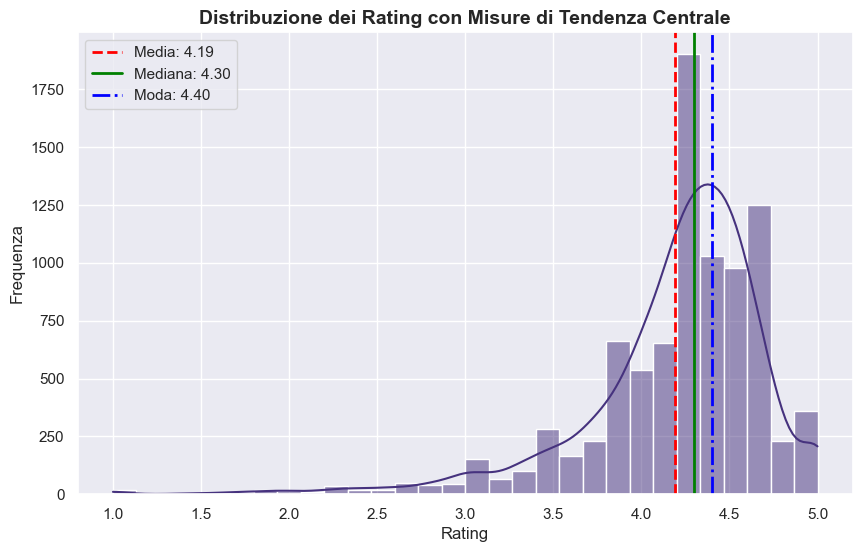

count    8877.000000
mean        4.188420
std         0.522432
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


In [113]:
# RATING
# Calcola media, mediana e moda
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
# Calcolo della moda: può esserci più di una moda
mode_rating = df['Rating'].mode()[0] 

# Crea l'istogramma
sns.histplot(df['Rating'], bins=30, kde=True)

# Aggiunge le linee per media, mediana e moda
plt.axvline(mean_rating, color='r', linestyle='--', linewidth=2, label=f'Media: {mean_rating:.2f}')
plt.axvline(median_rating, color='g', linestyle='-', linewidth=2, label=f'Mediana: {median_rating:.2f}')
plt.axvline(mode_rating, color='b', linestyle='-.', linewidth=2, label=f'Moda: {mode_rating:.2f}')

# Aggiunge titolo, etichette e legenda
plt.title("Distribuzione dei Rating con Misure di Tendenza Centrale", fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Frequenza")
plt.legend()
plt.show()

# Stampa le statistiche descrittive 
print(df['Rating'].describe())

-------
Le app presenti nel dataset mostrano in media un'elevata qualità percepita dagli utenti, con un rating medio pari a 4,19 su 5.
Il 50% delle app ottiene una valutazione pari o superiore a 4,3, mentre il 75% supera il valore di 4,0, confermando una generale soddisfazione dell’utenza.
La deviazione standard relativamente contenuta (0,52) indica che la maggior parte delle valutazioni si concentra in un intervallo ristretto, riducendo la presenza di app con performance particolarmente negative.
Questo può riflettere un’efficace selezione iniziale da parte degli utenti, o una maggiore attenzione da parte degli sviluppatori nel mantenere un buon livello qualitativo per restare competitivi sul mercato.

-----

count    598.000000
mean       4.505870
std        5.788226
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max       79.990000
Name: Price_$, dtype: float64


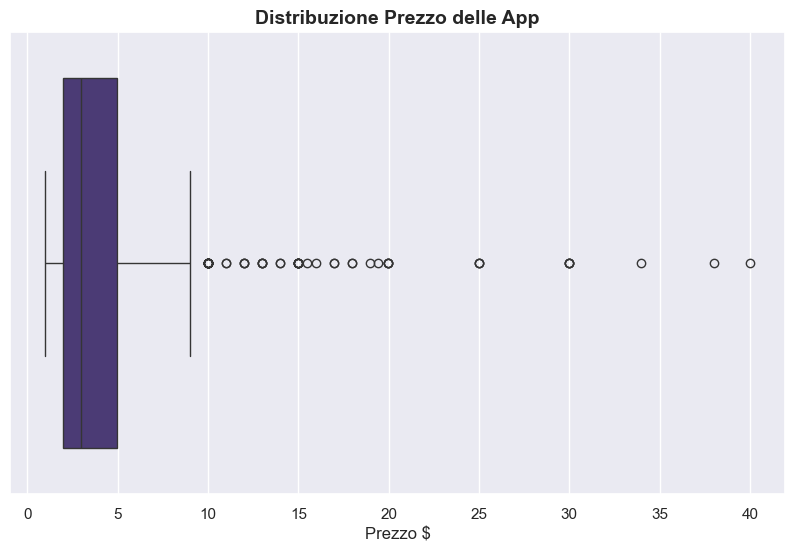

In [114]:
# PRICE
df_paid = df[(df['Type'] == 'Paid') & (df['Price_$'] <= 50)]
sns.boxplot(x=df_paid['Price_$'])
plt.title("Distribuzione Prezzo delle App", fontsize=14, fontweight='bold')
plt.xlabel('Prezzo $')
plt.show

# Stampa le statistiche descrittive 
print(df[df['Type'] == 'Paid']['Price_$'].describe())

---------------
Tra le app a pagamento, la distribuzione dei prezzi evidenzia una concentrazione significativa nella fascia tra 2 e 5 dollari, in cui si colloca circa il 50% delle osservazioni.
Il prezzo medio è pari a 4,51 dollari, la presenza di outlier, alcuni con prezzi fino a 79,99 dollari contribuisce a un’elevata deviazione standard (5,79 $), indicando una forte variabilità.
Questo suggerisce che, sebbene la maggior parte degli sviluppatori adotti strategie di prezzo conservative e accessibili, una piccola quota punti a un posizionamento premium, potenzialmente legato a nicchie di mercato o a funzionalità professionali ad alto valore percepito.

--------------

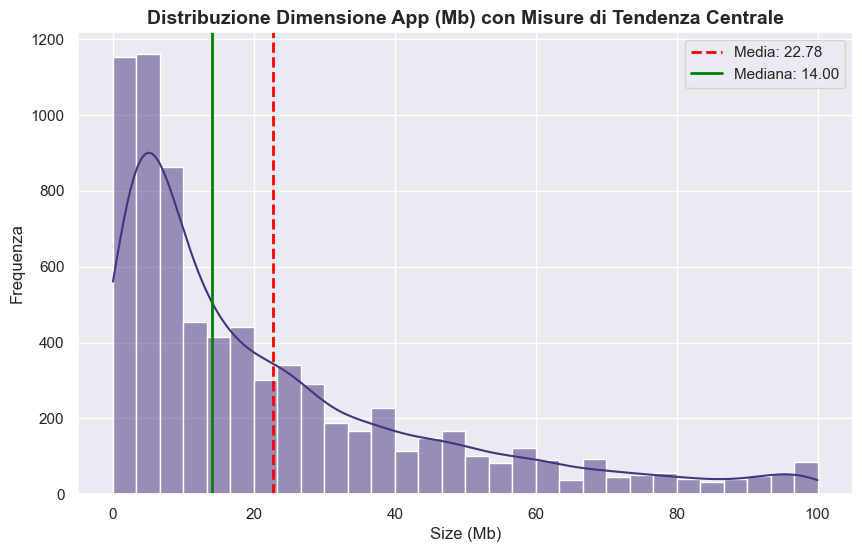

count    7409.000000
mean       22.775311
std        23.445129
min         0.010000
25%         5.100000
50%        14.000000
75%        33.000000
max       100.000000
Name: Size_MB, dtype: float64


In [86]:
# SIZE MB

# Calcola media, mediana e moda
mean_size = df['Size_MB'].mean()
median_size = df['Size_MB'].median()

# Crea l'istogramma
sns.histplot(df['Size_MB'].dropna(), bins=30, kde=True)

# Aggiunge le linee per media, mediana e moda
plt.axvline(mean_size, color='r', linestyle='--', linewidth=2, label=f'Media: {mean_size:.2f}')
plt.axvline(median_size, color='g', linestyle='-', linewidth=2, label=f'Mediana: {median_size:.2f}')

plt.title('Distribuzione Dimensione App (Mb) con Misure di Tendenza Centrale', fontsize=14, fontweight='bold')
plt.xlabel('Size (Mb)')
plt.ylabel('Frequenza')
plt.legend()
plt.show()

print(df['Size_MB'].describe())

-----
La distribuzione delle dimensioni delle app (in MB) è fortemente asimmetrica, con una media di circa 22,78 MB ma una mediana sensibilmente più bassa (14 MB), indicando la presenza di app significativamente più pesanti che influenzano la media.
Il 50% delle app ha una dimensione compresa tra 5,1 MB e 33 MB, mentre il valore massimo raggiunge i 100 MB, evidenziando la presenza di outlier.
La deviazione standard elevata (23,45 MB) conferma l’eterogeneità delle dimensioni, verosimilmente legata alla complessità dell’applicazione, al tipo di contenuti multimediali integrati e al target funzionale (giochi, strumenti professionali, ecc.).
In un’ottica di ottimizzazione dell’esperienza utente, questa variabilità potrebbe influenzare le scelte di download in funzione dello spazio disponibile sul dispositivo o della qualità della connessione.

-----

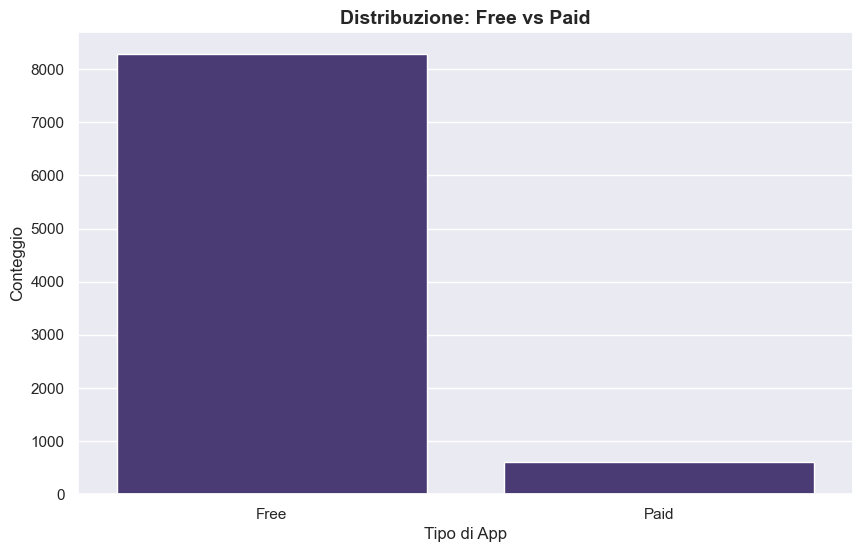

Type
Free    0.932635
Paid    0.067365
Name: proportion, dtype: float64


In [87]:
# TYPE (FREE - PAID)
sns.countplot(x='Type', data=df)
plt.title('Distribuzione: Free vs Paid',fontsize=14, fontweight='bold')
plt.xlabel('Tipo di App')
plt.ylabel('Conteggio')
plt.show()

print(df['Type'].value_counts(normalize=True))


------------------------------------------------------------------------------------------
L’elevata percentuale di app gratuite (93%) riflette una strategia di mercato centrata sul modello freemium, dove l’acquisizione dell’utente avviene senza barriere economiche iniziali. È plausibile che la monetizzazione avvenga successivamente attraverso acquisti in-app o l’eliminazione degli annunci pubblicitari, evidenziando l'importanza di massimizzare il coinvolgimento iniziale dell'utente.

-----------------------------------------------------------------------------------------

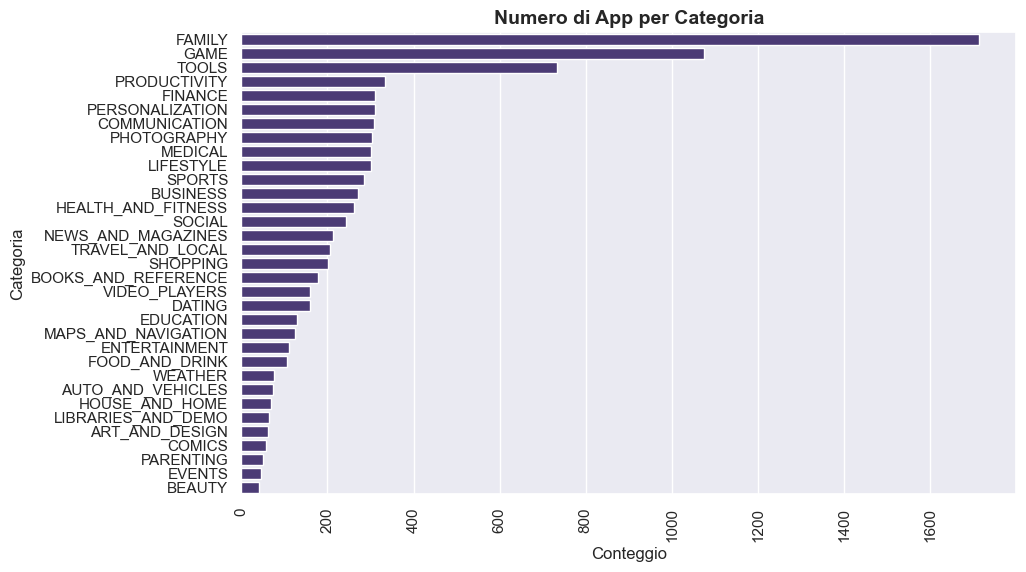

Category
FAMILY                 0.193083
GAME                   0.120987
TOOLS                  0.082686
PRODUCTIVITY           0.037625
FINANCE                0.035034
PERSONALIZATION        0.034922
COMMUNICATION          0.034584
PHOTOGRAPHY            0.034246
MEDICAL                0.034021
LIFESTYLE              0.033795
SPORTS                 0.032218
BUSINESS               0.030416
HEALTH_AND_FITNESS     0.029514
SOCIAL                 0.027487
NEWS_AND_MAGAZINES     0.024107
TRAVEL_AND_LOCAL       0.023093
SHOPPING               0.022755
BOOKS_AND_REFERENCE    0.019939
VIDEO_PLAYERS          0.018024
DATING                 0.017911
EDUCATION              0.014532
MAPS_AND_NAVIGATION    0.013969
ENTERTAINMENT          0.012504
FOOD_AND_DRINK         0.011941
WEATHER                0.008449
AUTO_AND_VEHICLES      0.008223
HOUSE_AND_HOME         0.007660
LIBRARIES_AND_DEMO     0.007322
ART_AND_DESIGN         0.006984
COMICS                 0.006534
PARENTING              0.005633

In [88]:
# CATEGORY

plt.xticks(rotation=90)
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Numero di App per Categoria',fontsize=14, fontweight='bold')
plt.xlabel('Conteggio')
plt.ylabel('Categoria')
plt.show()

print(df['Category'].value_counts(normalize=True))

-------
La distribuzione delle app per categoria mostra una forte concentrazione in pochi segmenti chiave. In particolare, la categoria "Family" domina con il 19,3% delle app totali, seguita da "Game" (12,1%) e "Tools" (8,3%).
Queste tre sole categorie rappresentano oltre il 39% dell’intero ecosistema, evidenziando un’offerta fortemente polarizzata verso contenuti ludico-educativi e strumenti pratici di utilità generale.
Le categorie legate alla produttività, alla finanza, alla comunicazione e alla fotografia mantengono una quota tra il 3% e il 4%, indicando una presenza significativa ma meno dominante.
In coda troviamo categorie di nicchia come "Beauty", "Events" o "Parenting", ciascuna con una quota inferiore all’1%, che potrebbero rappresentare opportunità di sviluppo in contesti meno saturi.
L’analisi suggerisce che, per strategie di posizionamento e differenziazione, potrebbe essere vantaggioso valutare l’ingresso in mercati meno competitivi ma potenzialmente in crescita.

----

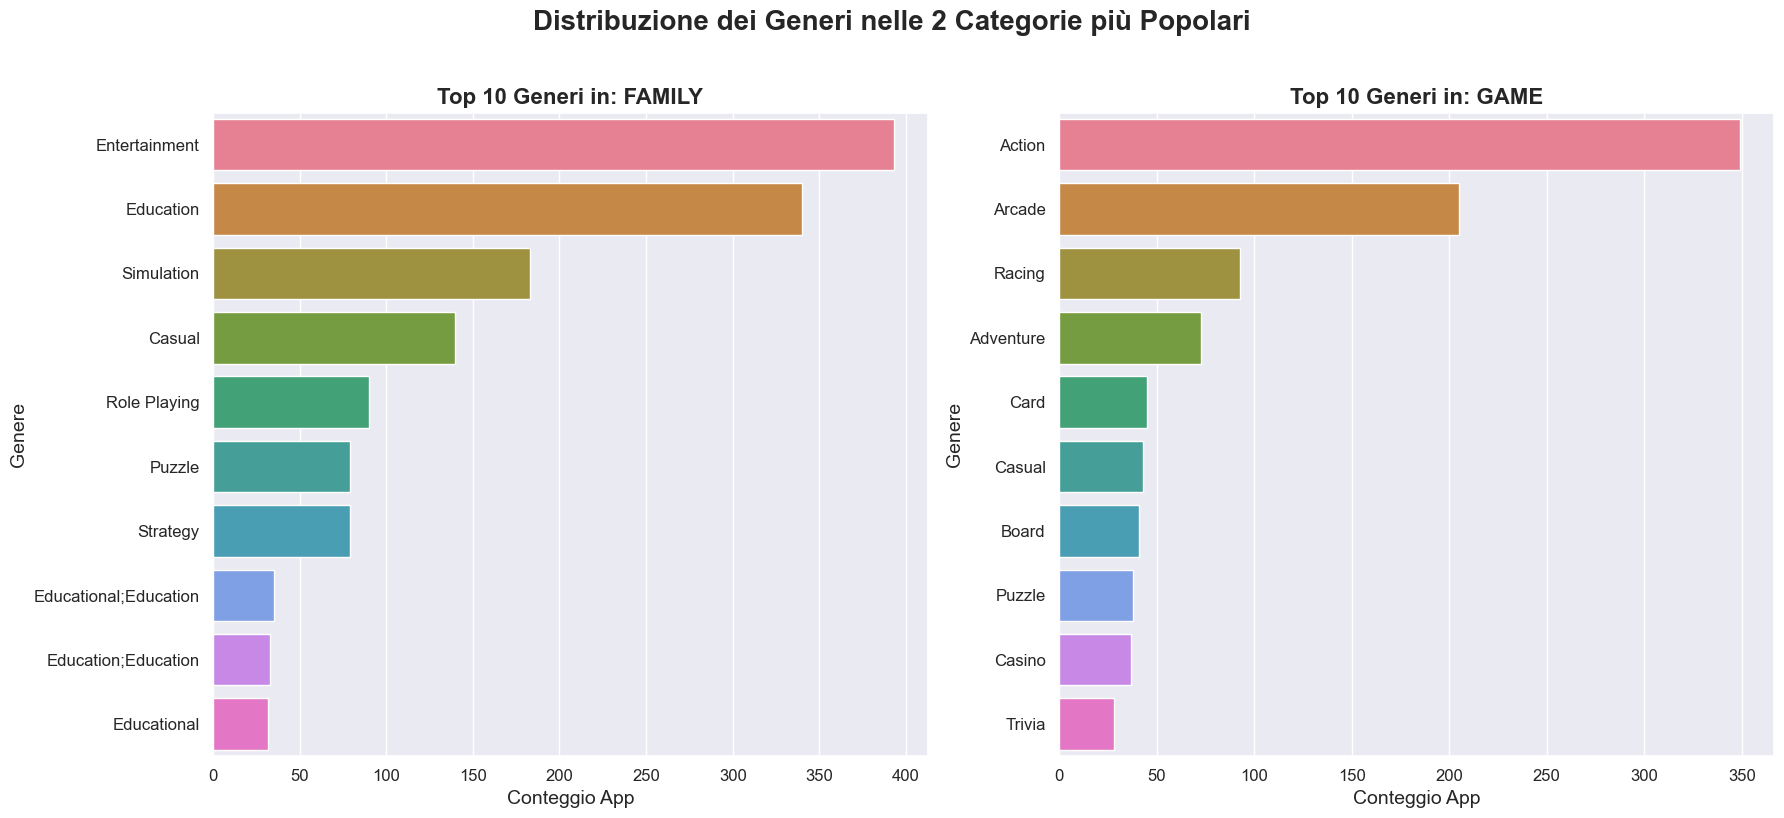

Distribuzione percentuale dei primi 10 Generi nella categoria 'FAMILY':
Genres
Entertainment            22.93
Education                19.84
Simulation               10.68
Casual                    8.17
Role Playing              5.25
Puzzle                    4.61
Strategy                  4.61
Educational;Education     2.04
Education;Education       1.93
Educational               1.87

------------------------------------------------------------

Distribuzione percentuale dei primi 10 Generi nella categoria 'GAME':
Genres
Action       32.50
Arcade       19.09
Racing        8.66
Adventure     6.80
Card          4.19
Casual        4.00
Board         3.82
Puzzle        3.54
Casino        3.45
Trivia        2.61

------------------------------------------------------------



In [89]:
# Solo le prime due categorie hanno dei sotto gruppi
# Seleziona le 2 categorie più popolari
top_2_categories = df['Category'].value_counts().nlargest(2).index

# Crea una figura con 1 riga e 2 colonne, adatta per 2 grafici
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
axes = axes.flatten()

# Aggiungi un titolo generale per l'intera figura
fig.suptitle('Distribuzione dei Generi nelle 2 Categorie più Popolari', fontsize=20, fontweight='bold', y=1.02)

for i, category in enumerate(top_2_categories):
    # Filtra il DataFrame per la categoria corrente
    df_cat = df[df['Category'] == category]

    # Conta i generi e prendi i primi 10
    top_10_genres = df_cat['Genres'].value_counts().nlargest(10)
    
    # Crea un grafico a barre nel subplot corrente
    sns.barplot(x=top_10_genres.values, y=top_10_genres.index, ax=axes[i], hue=top_10_genres.index, legend=False)
    
    # Formattazione titoli etichette
    axes[i].set_title(f'Top 10 Generi in: {category}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Conteggio App', fontsize=14)
    axes[i].set_ylabel('Genere', fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

for category in top_2_categories:
    df_cat = df[df['Category'] == category]
    genre_counts = df_cat['Genres'].value_counts(normalize=True).nlargest(10) * 100
    print(f"Distribuzione percentuale dei primi 10 Generi nella categoria '{category}':")
    print(genre_counts.round(2).to_string())
    print("\n" + "-"*60 + "\n")



-------
Nell’analisi dei generi dominanti all’interno delle due categorie più popolari Family e Game emergono pattern distinti che riflettono differenti strategie di engagement degli utenti.

Nella categoria Family, la varietà dei generi evidenzia una forte componente educativa e ricreativa. I generi Entertainment (22,93%) ed Education (19,84%) coprono oltre il 40% delle app, indicando un orientamento verso contenuti didattici e interattivi, spesso destinati a bambini e genitori. Seguono Simulation (10,68%), Casual (8,17%) e Role Playing (5,25%), che confermano un approccio ludico-educativo.

Al contrario, nella categoria Game domina una logica più orientata alla competizione e all'intrattenimento. Il genere Action rappresenta da solo il 32,5% delle app, seguito da Arcade (19,09%) e Racing (8,66%). Altri generi come Adventure, Card, Board e Puzzle si distribuiscono in percentuali minori, ma sempre significative.
Questo conferma una segmentazione più netta, dove gli utenti si aspettano esperienze dinamiche e coinvolgenti, spesso legate a skill e progressione.

In sintesi, le due categorie evidenziano strategie di contenuto profondamente diverse: Family punta su accessibilità e valore educativo, mentre Game mira a stimolare la competitività e l’intrattenimento. Tali differenze possono influenzare sia le modalità di monetizzazione che il tipo di pubblico target da raggiungere con campagne di marketing dedicate.

-------

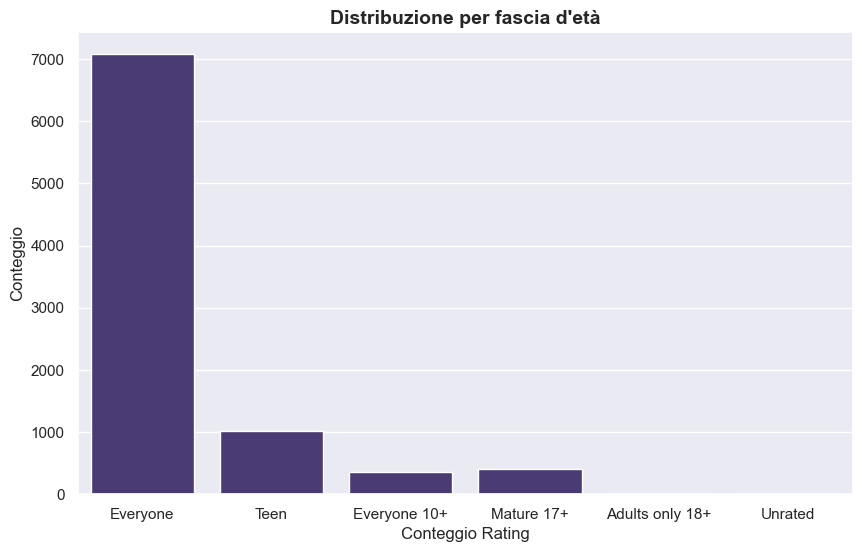

Content Rating
Everyone           0.797679
Teen               0.115016
Mature 17+         0.046299
Everyone 10+       0.040554
Adults only 18+    0.000338
Unrated            0.000113
Name: proportion, dtype: float64


In [90]:
#CONTENT RATING

sns.countplot(x='Content Rating', data=df)
plt.title("Distribuzione per fascia d'età", fontsize=14, fontweight='bold')
plt.xlabel('Conteggio Rating')
plt.ylabel('Conteggio')
plt.show()

print(df['Content Rating'].value_counts(normalize=True))

-------
L’analisi della variabile Content Rating evidenzia una netta predominanza di app destinate a un pubblico generico: circa l’80% delle app è classificato come "Everyone", rendendole adatte a tutte le fasce d’età.
A seguire, le app destinate a teenager (11,5%) e a utenti maggiori di 17 anni (4,6%) rappresentano una quota molto più contenuta, mentre le app classificate come "Adults only 18+" o "Unrated" costituiscono una porzione trascurabile del totale.

Questa distribuzione suggerisce che la maggior parte delle app sul mercato punta a massimizzare la base utenti potenziale, adottando contenuti generalisti e accessibili.
Dal punto di vista strategico, le fasce più giovani e le famiglie sembrano essere il target principale, con una chiara tendenza ad evitare contenuti che potrebbero limitarne la diffusione nei principali store.
Per sviluppatori e marketer, ciò implica che eventuali app rivolte a un pubblico maturo potrebbero trovare meno concorrenza, ma al prezzo di una minor visibilità e diffusione organica.

-------

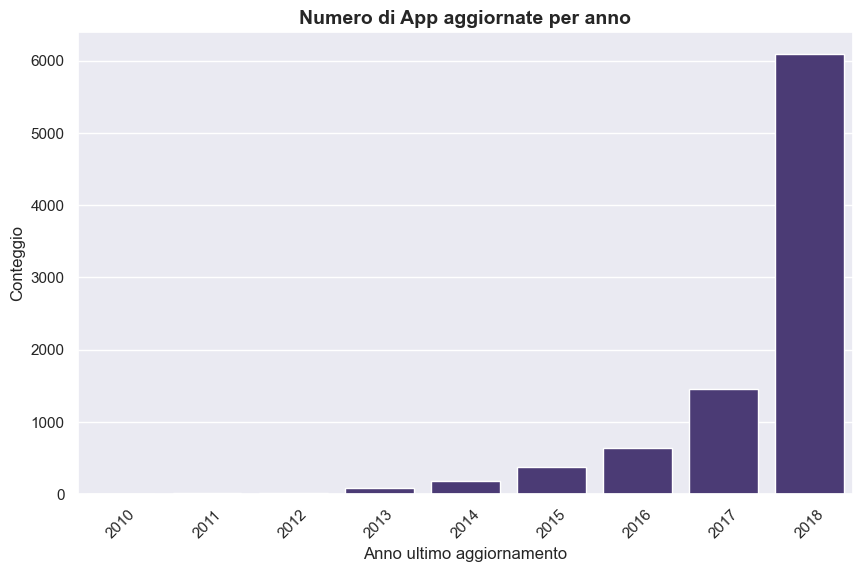

count                             8877
mean     2017-11-21 17:24:11.436295936
min                2010-05-21 00:00:00
25%                2017-09-21 00:00:00
50%                2018-05-28 00:00:00
75%                2018-07-23 00:00:00
max                2018-08-08 00:00:00
Name: Last Updated, dtype: object


In [91]:
# LAST UPDATE 

df['Last Update Year'] = df['Last Updated'].dt.year

sns.countplot(x='Last Update Year', data=df, order=sorted(df['Last Update Year'].dropna().unique()))
plt.title('Numero di App aggiornate per anno', fontsize=14, fontweight='bold')
plt.xlabel('Anno ultimo aggiornamento')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()

print(df['Last Updated'].describe())

------
La maggior parte delle app è stata aggiornata tra la fine del 2017 e metà 2018, con una data mediana di aggiornamento al 28 maggio 2018.
Le app meno aggiornate risalgono al 2010, ma rappresentano una netta minoranza. Questo suggerisce una base applicativa generalmente recente e una certa attenzione da parte degli sviluppatori alla manutenzione e all'aggiornamento delle proprie app.

-----

# 4. Analisi Bivariata e Multivariata

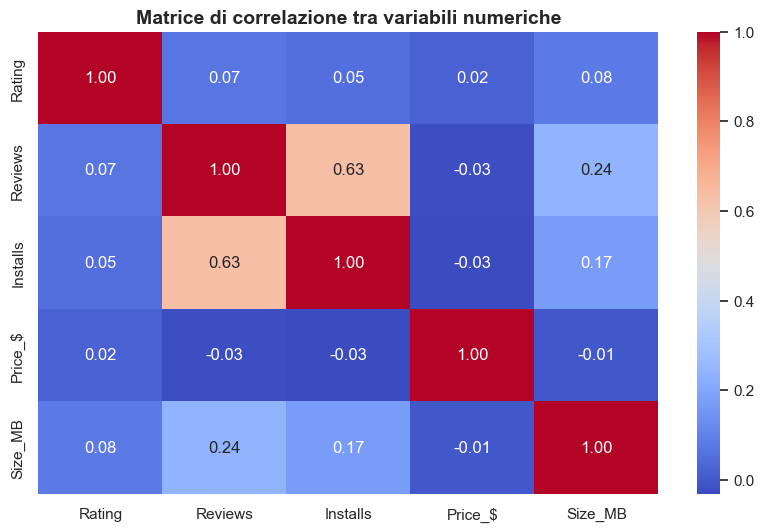

In [116]:
# Selezioni le variabili numeriche
num_vars = ['Rating', 'Reviews', 'Installs', 'Price_$', 'Size_MB']

# Matrice di correlazione
corr_matrix = df[num_vars].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione tra variabili numeriche',fontsize=14, fontweight='bold')
plt.show()

------
Dalla matrice di correlazione emerge che la relazione più forte si registra tra Reviews e Installs (r = 0.63), evidenziando un legame diretto tra popolarità e partecipazione dell’utenza.
Questo rapporto, tuttavia, potrebbe essere bidirezionale: da un lato, app molto scaricate tendono naturalmente ad accumulare più recensioni; dall’altro, un elevato numero di recensioni (soprattutto se positive) può aumentare la visibilità organica dell’app, incentivando ulteriori installazioni attraverso meccanismi di social proof e ranking sugli store.

Le altre variabili mostrano correlazioni deboli. Size_MB ha una correlazione moderata con Reviews (r = 0.24) e Installs (r = 0.17), suggerendo che app più pesanti, forse più ricche di contenuti tendono verso una maggiore diffusione.
Rating invece, non mostra relazioni significative con le altre variabili, indicando che un buon punteggio non è necessariamente associato a un alto numero di download o recensioni.
Anche Price_$ risulta scollegato da tutte le altre metriche, confermando che la strategia di prezzo viene spesso definita indipendentemente dalla qualità percepita o dal successo dell’app.

In sintesi, la visibilità e il successo di un'app sembrano guidati più da interazioni sociali e metriche di engagement (come le recensioni) che da caratteristiche tecniche o economiche. Ciò evidenzia l’importanza, per gli sviluppatori, di promuovere attivamente il coinvolgimento degli utenti, incentivando la recensione e il feedback per alimentare un ciclo virtuoso di crescita organica.

-------

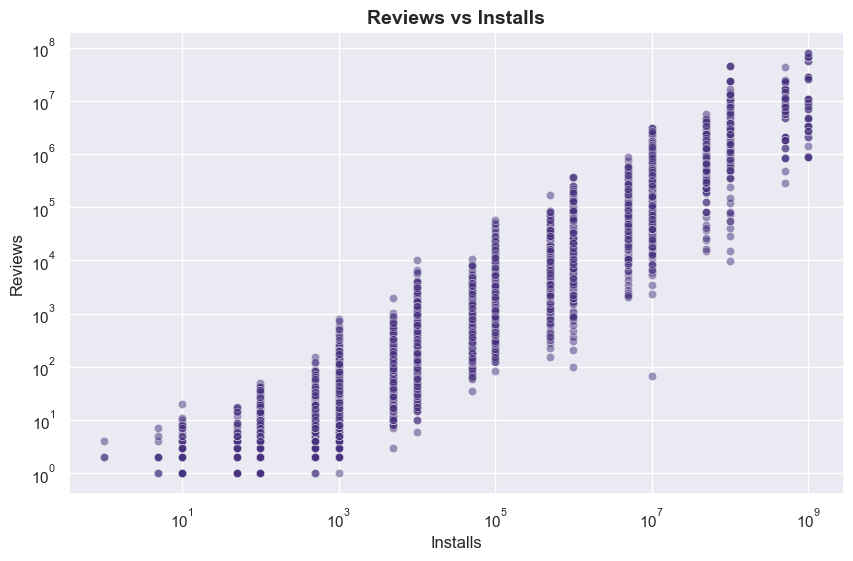

           Installs       Reviews
count  8.877000e+03  8.877000e+03
mean   1.651749e+07  4.735742e+05
std    8.644630e+07  2.907440e+06
min    1.000000e+00  1.000000e+00
25%    1.000000e+04  1.640000e+02
50%    5.000000e+05  4.756000e+03
75%    5.000000e+06  7.142100e+04
max    1.000000e+09  7.815831e+07


In [117]:
# SCATTERPLOT REVIEWS INSTALLS

sns.scatterplot(data=df, x='Installs', y='Reviews', alpha=0.5)
plt.title('Reviews vs Installs',fontsize=14, fontweight='bold')
plt.xscale('log')
plt.yscale('log')
plt.show()

print(df[['Installs', 'Reviews']].describe())

----
Le variabili Installs e Reviews mostrano una distribuzione fortemente asimmetrica, con valori estremi che evidenziano la presenza di app virali o di grandissimo successo.
La mediana delle installazioni si attesta a 500.000, ma il valore medio supera i 16 milioni, segno di una forte distorsione causata da outlier molto elevati (fino a 1 miliardo di installazioni).
Un pattern analogo si osserva per le recensioni: la mediana è di circa 4.756 recensioni, mentre la media supera le 473.000, con picchi che superano i 78 milioni.

Questo conferma l’effetto cumulativo già evidenziato nella matrice di correlazione: app con alta visibilità tendono a generare una crescita esponenziale sia in termini di download che di interazioni con gli utenti.
In ottica strategica, questo tipo di distribuzione suggerisce che il mercato sia dominato da poche app altamente performanti, mentre la maggior parte delle applicazioni si colloca in una fascia bassa o intermedia.
Per emergere, risulta quindi cruciale stimolare il coinvolgimento iniziale e puntare su strategie di crescita organica (es. recensioni e condivisioni), in grado di attivare meccanismi di visibilità progressiva.

---

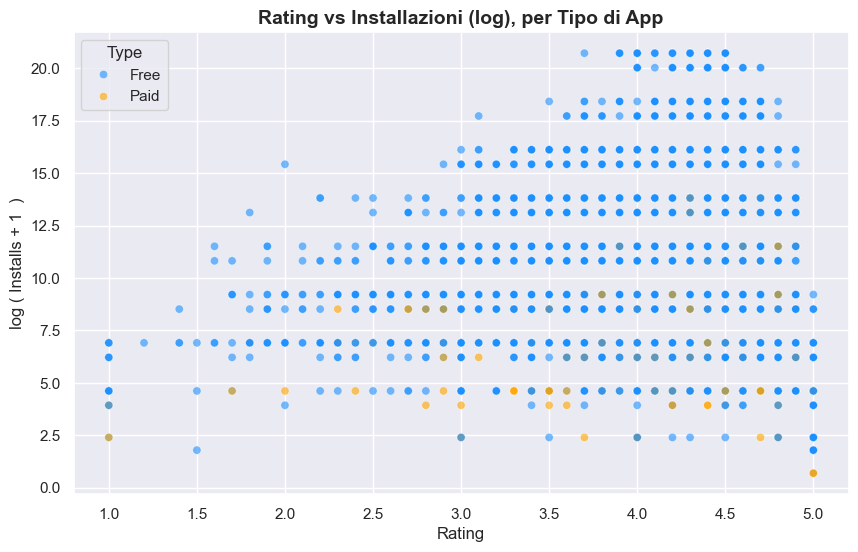

     Log_Installs                                                      \
            count       mean       std       min       25%        50%   
Type                                                                    
Free       8279.0  12.467330  3.745768  0.693147  9.210440  13.122365   
Paid        598.0   8.315017  2.780443  0.693147  6.908755   8.517393   

                            Rating                                          \
            75%        max   count      mean       std  min  25%  50%  75%   
Type                                                                         
Free  15.424949  20.723266  8279.0  4.182425  0.519347  1.0  4.0  4.3  4.5   
Paid  10.819798  16.118096   598.0  4.271405  0.557274  1.0  4.1  4.4  4.6   

           
      max  
Type       
Free  5.0  
Paid  5.0  


In [118]:
# SCATTERPLOT RATING VS INSTALLS
palette_colors = {'Free': 'dodgerblue', 'Paid': 'orange'}
sns.scatterplot(data=df, x='Rating', y=np.log1p(df['Installs']), hue='Type',palette=palette_colors, alpha=0.6)
plt.title('Rating vs Installazioni (log), per Tipo di App',fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('log ( Installs + 1  )')
plt.show()


print(
    df
    .assign(Log_Installs = np.log1p(df['Installs']))
    .groupby('Type')[['Log_Installs', 'Rating']]
    .describe()
)


------
Analizzando la relazione tra Rating e Log_Installs per le app gratuite e a pagamento emergono differenze significative tra le due categorie.
Le app gratuite mostrano un valore medio di installazioni (logaritmo naturale) significativamente più alto (media ~12.47) rispetto alle app a pagamento (media ~8.32), indicando un bacino d’utenza molto più ampio.
Tuttavia, le app a pagamento si distinguono per un rating medio leggermente superiore (4.27 vs 4.18), suggerendo che gli utenti tendono a valutare più positivamente le app che hanno acquistato direttamente.

La maggiore diffusione delle app gratuite può essere spiegata dall’abbattimento della barriera all’ingresso, che permette un’adozione più rapida e ampia.
D’altro canto, la qualità percepita dagli utenti, riflessa nel rating, sembra premiare maggiormente le app a pagamento, forse per via di una maggiore attenzione a funzionalità e user experience.

In sintesi, mentre le app gratuite dominano in termini di volume di installazioni, le app a pagamento si posizionano con una reputazione leggermente migliore, un dato che può orientare strategie di monetizzazione e sviluppo prodotto.
Gli sviluppatori dovrebbero quindi considerare non solo la diffusione, ma anche l’esperienza utente e la qualità percepita, elementi fondamentali per mantenere una base di utenti fidelizzata e soddisfatta.

----

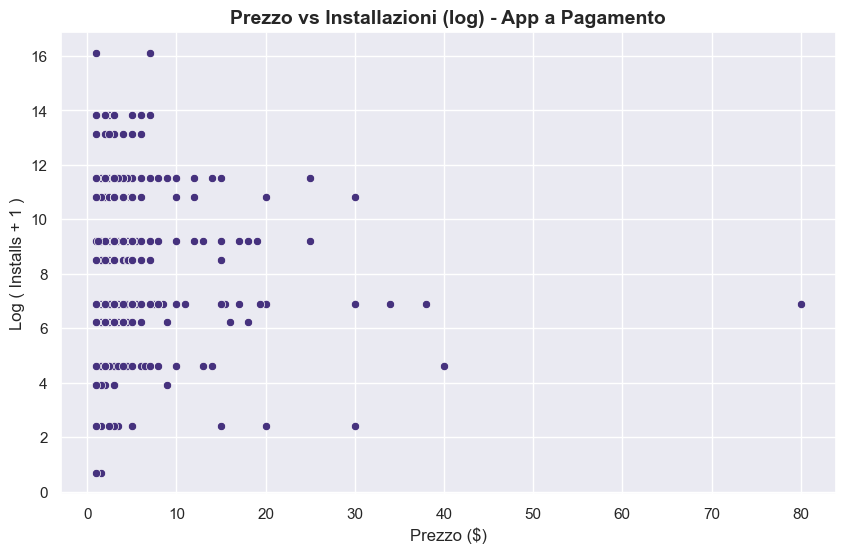

          Price_$  Log_Installs
count  598.000000    598.000000
mean     4.505870      8.315017
std      5.788226      2.780443
min      0.990000      0.693147
25%      1.990000      6.908755
50%      2.990000      8.517393
75%      4.990000     10.819798
max     79.990000     16.118096


In [119]:
# SCATTERPLOT PRICE VS INSTALLS
df_paid = df[df['Type'] == 'Paid']

sns.scatterplot(data=df_paid, x='Price_$', y=np.log1p(df_paid['Installs']))
plt.title("Prezzo vs Installazioni (log) - App a Pagamento",fontsize=14, fontweight='bold')
plt.xlabel("Prezzo ($)")
plt.ylabel("Log ( Installs + 1 )")
plt.show()

print(
    df_paid
    .assign(Log_Installs = np.log1p(df_paid['Installs']))
    [['Price_$', 'Log_Installs']]
    .describe()
)



----
Il grafico scatter tra prezzo e installazioni (logaritmo naturale) mostra una tendenza generale di riduzione del numero di installazioni al crescere del prezzo dell’app.
La maggior parte delle app a pagamento si concentra in una fascia di prezzo compresa tra 1 e 5 dollari, dove si registra anche la maggior densità di installazioni, suggerendo che i prezzi più contenuti favoriscono una più ampia diffusione.
È interessante notare la presenza di pochi outlier con prezzi molto elevati (fino a circa 80 dollari) che però corrispondono a valori di installazioni relativamente bassi, confermando come prezzi alti possano limitare significativamente il bacino di utenti raggiunto.

Questo pattern supporta un modello di pricing basato su volumi elevati a prezzi contenuti per massimizzare la diffusione, mentre prezzi più alti possono essere giustificati solo in nicchie molto specifiche o con offerte particolarmente differenziate.
Da un punto di vista strategico, gli sviluppatori di app a pagamento devono quindi bilanciare attentamente la scelta del prezzo, tenendo conto della sensibilità del mercato e dell’effetto diretto sul numero di installazioni.

---

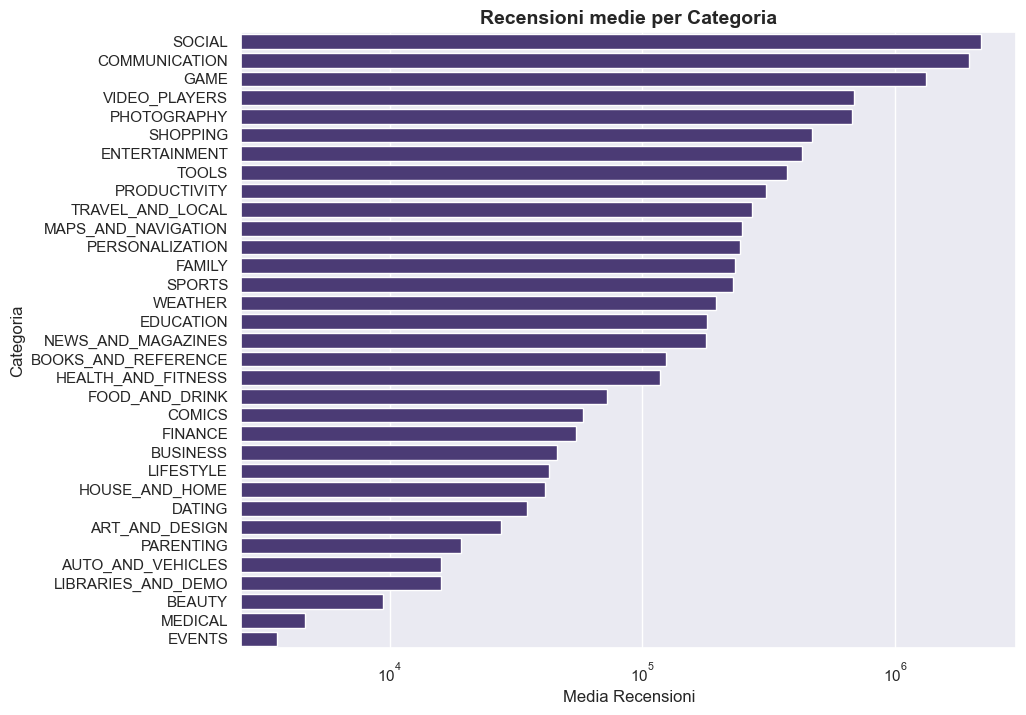

In [120]:
# REVIEWS MEDI PER CATEGORIA

category_rewiews = df.groupby('Category')['Reviews'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=category_rewiews.values, y=category_rewiews.index)
plt.title('Recensioni medie per Categoria',fontsize=14, fontweight='bold')
plt.xlabel('Media Recensioni')
plt.ylabel('Categoria')
plt.xscale('log')
plt.show()

-----
L’analisi delle recensioni medie per categoria evidenzia come le app nei settori Social e Communication raccolgano un numero di recensioni significativamente più elevato rispetto alle altre categorie, con valori medi superiori ai 2 milioni di recensioni.
Questi dati riflettono una forte interazione e coinvolgimento degli utenti, probabilmente dovuti all’ampia base installata e alla natura sociale di queste app, dove il feedback degli utenti è spesso più attivo e frequente.
Anche la categoria Game si distingue con una media elevata di recensioni (oltre 1.3 milioni), coerente con il suo peso in termini di installazioni e varietà di titoli disponibili.
Le categorie con minore numero di recensioni medie, come Medical, Events e Beauty, potrebbero indicare mercati di nicchia o app con una base utenti più limitata o meno propensa a lasciare feedback.

Complessivamente, la distribuzione delle recensioni conferma l’importanza di una solida base utenti attiva per ottenere visibilità e migliorare il posizionamento sul mercato.
Per gli sviluppatori, investire in categorie con alti livelli di interazione e feedback può rappresentare un’opportunità strategica per affinare continuamente il prodotto e aumentare il coinvolgimento degli utenti.

----

# 5. Analisi competitiva per categoria

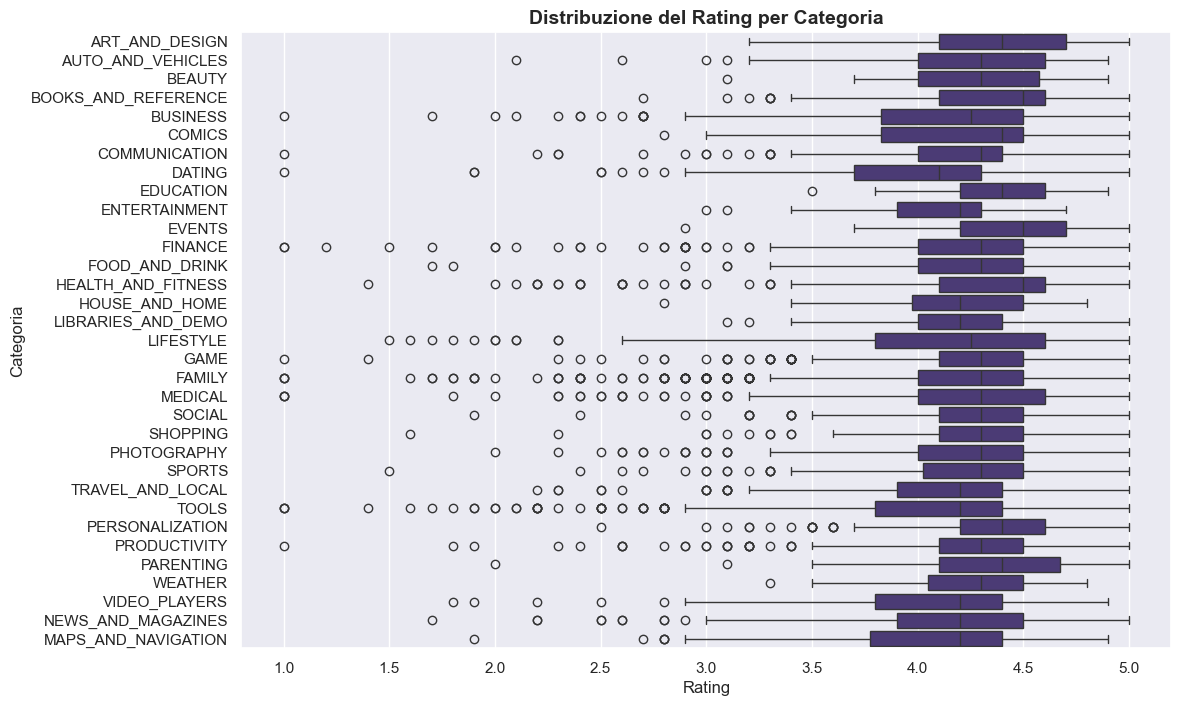

                      count      mean       std  min    25%   50%    75%  max
Category                                                                     
ART_AND_DESIGN         62.0  4.358065  0.358297  3.2  4.100  4.40  4.700  5.0
AUTO_AND_VEHICLES      73.0  4.190411  0.543692  2.1  4.000  4.30  4.600  4.9
BEAUTY                 42.0  4.278571  0.362603  3.1  4.000  4.30  4.575  4.9
BOOKS_AND_REFERENCE   177.0  4.347458  0.429861  2.7  4.100  4.50  4.600  5.0
BUSINESS              270.0  4.102593  0.652214  1.0  3.825  4.25  4.500  5.0
COMICS                 58.0  4.155172  0.537758  2.8  3.825  4.40  4.500  5.0
COMMUNICATION         307.0  4.151466  0.438383  1.0  4.000  4.30  4.400  5.0
DATING                159.0  3.971698  0.621058  1.0  3.700  4.10  4.300  5.0
EDUCATION             129.0  4.375969  0.260341  3.5  4.200  4.40  4.600  4.9
ENTERTAINMENT         111.0  4.136036  0.321019  3.0  3.900  4.20  4.300  4.7
EVENTS                 45.0  4.435556  0.419499  2.9  4.200  4.5

In [121]:
# BOXPLOT RATING CATEGORY
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Rating', y='Category')
plt.title("Distribuzione del Rating per Categoria",fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Categoria")
plt.show()

print(df.groupby('Category')['Rating'].describe())

--------
L’analisi della distribuzione dei rating per categoria, rappresentata tramite boxplot, evidenzia una generale tendenza a valori elevati, con medie che nella maggior parte dei casi si attestano tra 4.1 e 4.3, e una mediana che si mantiene stabilmente attorno al 4.3 per quasi tutte le categorie.
Le categorie con i rating medi più alti includono:

Events (media: 4.44),

Education (4.38),

Art and Design (4.36),

Personalization (4.33),

Books and Reference (4.35).

Questi settori sembrano godere di una valutazione particolarmente positiva da parte degli utenti, forse per la natura specifica dei contenuti offerti e per una maggiore soddisfazione rispetto alle aspettative.

Al contrario, categorie come Dating (3.97), Maps and Navigation (4.05), Tools (4.05), Video Players (4.06) e Business (4.10) presentano rating medi inferiori alla media generale. In alcuni casi, come Dating e Business, la dispersione elevata (std > 0.6) e la presenza di outlier inferiori suggeriscono una maggiore insoddisfazione o polarizzazione nei giudizi degli utenti.

Nonostante le differenze tra categorie, la varianza complessiva dei rating è contenuta, con un valore massimo di 5.0 e minimo compreso tra 1.0 e 3.0, ma con la maggior parte delle valutazioni concentrate nel range [4.0 – 4.5].

In sintesi, il boxplot mostra che il livello qualitativo percepito delle app è generalmente alto e stabile nel tempo. Tuttavia, alcune categorie presentano una maggiore variabilità e richiedono attenzione mirata in termini di user experience per migliorare la soddisfazione complessiva.

----

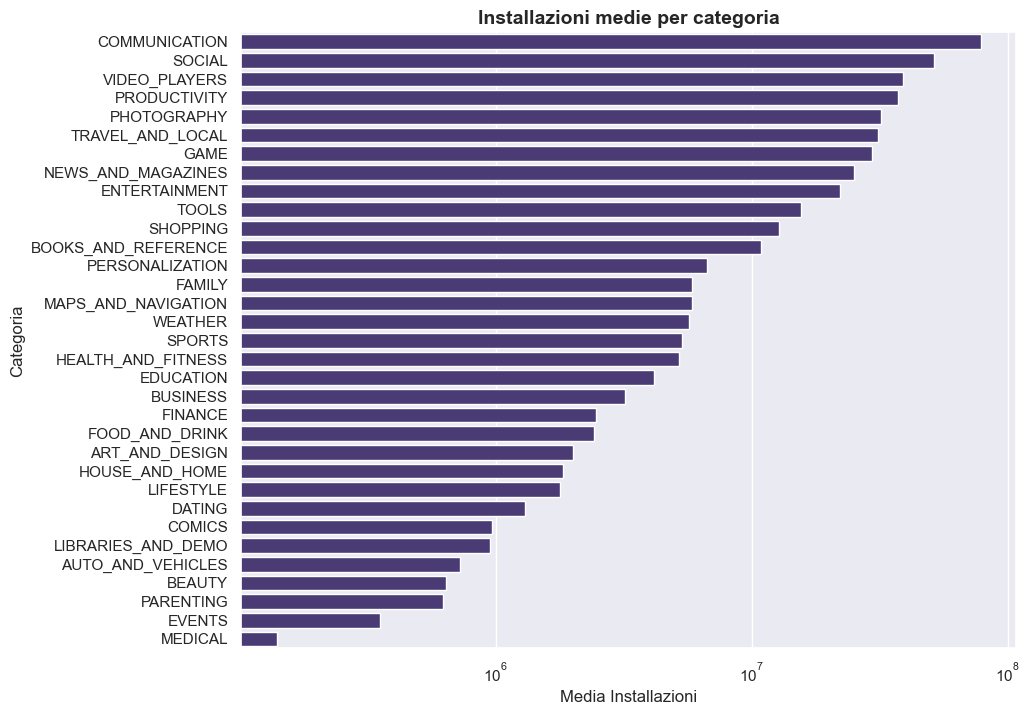

                      count          mean           std      min        25%  \
Category                                                                      
ART_AND_DESIGN         62.0  2.003760e+06  6.813394e+06    100.0    10000.0   
AUTO_AND_VEHICLES      73.0  7.278055e+05  1.866462e+06    100.0    10000.0   
BEAUTY                 42.0  6.408619e+05  1.691597e+06    100.0    10000.0   
BOOKS_AND_REFERENCE   177.0  1.082651e+07  7.694090e+07      5.0     5000.0   
BUSINESS              270.0  3.198215e+06  1.279316e+07      5.0     1000.0   
COMICS                 58.0  9.661397e+05  2.132610e+06    100.0    10000.0   
COMMUNICATION         307.0  7.867180e+07  2.230826e+08     10.0    10000.0   
DATING                159.0  1.298883e+06  2.800956e+06     10.0    10000.0   
EDUCATION             129.0  4.138388e+06  1.257452e+07   1000.0   100000.0   
ENTERTAINMENT         111.0  2.212306e+07  9.730632e+07  10000.0  1000000.0   
EVENTS                 45.0  3.544313e+05  1.052350e

In [122]:
# ISTALLAZIONI MEDIE PER CATEGORIA

category_installs = df.groupby('Category')['Installs'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=category_installs.values, y=category_installs.index)
plt.title('Installazioni medie per categoria',fontsize=14, fontweight='bold')
plt.xlabel('Media Installazioni')
plt.ylabel('Categoria')

plt.xscale('log')
plt.show()

print(df.groupby('Category')['Installs'].describe())

-----

Analizzando le installazioni medie per categoria, emergono chiaramente due direttrici utili per una strategia di sviluppo app: la popolarità del mercato e il grado di concorrenza. Categorie come Communication, Game, Social, Photography e Video Players registrano in media decine di milioni di installazioni, indicando una domanda potenziale elevatissima. Tuttavia, proprio per questa attrattività, è verosimile che in questi segmenti la concorrenza sia molto alta e la barriera d’ingresso significativa, richiedendo un prodotto fortemente differenziante o con un’ottima strategia di marketing per emergere.

Al contrario, settori come Medical, Events o Parenting mostrano installazioni medie molto più basse, il che può indicare nicchie meno presidiate e quindi maggiori opportunità di posizionamento, soprattutto per startup con risorse limitate. In un’ottica commerciale, queste categorie possono rappresentare spazi strategici da occupare, specialmente se si individua un bisogno non ancora soddisfatto o un target trascurato.

Un’ulteriore riflessione riguarda il prezzo: dallo scatterplot "Price vs Log_Installs", emerge che le app più scaricate tendono a essere gratuite o a basso prezzo. In chiave commerciale, questo suggerisce che per massimizzare la visibilità e incentivare l’adozione iniziale, è preferibile lanciare l’app con un modello freemium, puntando poi su funzionalità premium, abbonamenti o pubblicità per monetizzare. Questo approccio è coerente anche con il legame osservato tra numero di recensioni e visibilità: più utenti installano l’app, più recensioni si generano, aumentando ulteriormente la presenza nello store.

Infine, la scelta della categoria dovrebbe tenere conto anche del pubblico target e del tipo di relazione che si vuole instaurare con l’utente: ad esempio, le app Educationa, Food & Drink o Health & Fitness offrono ottime opportunità di engagement continuo, che possono tradursi in monetizzazione sostenibile nel tempo, anche in mercati meno affollati.

-----

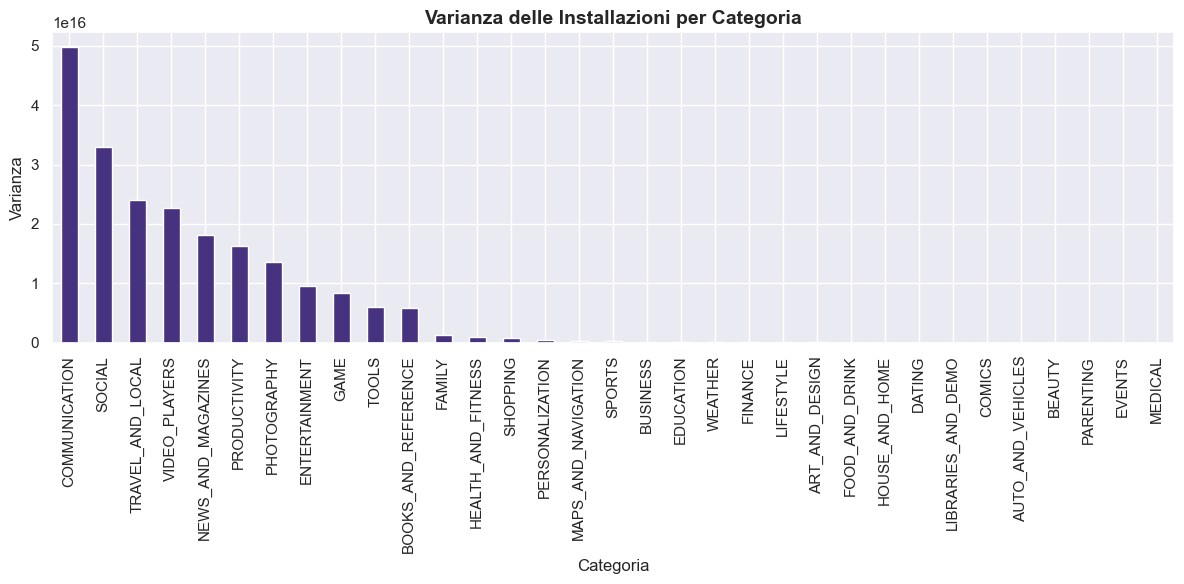

                     Media Installazioni      Varianza
Category                                              
COMMUNICATION                78671796.51  4.976584e+16
SOCIAL                       51286235.55  3.301790e+16
TRAVEL_AND_LOCAL             31033460.00  2.395141e+16
VIDEO_PLAYERS                38886857.50  2.275949e+16
NEWS_AND_MAGAZINES           25201451.64  1.816509e+16
PRODUCTIVITY                 37314581.38  1.619334e+16
PHOTOGRAPHY                  31977773.45  1.357786e+16
ENTERTAINMENT                22123063.06  9.468519e+15
GAME                         29370449.46  8.442216e+15
TOOLS                        15600442.10  6.000949e+15
BOOKS_AND_REFERENCE          10826506.53  5.919902e+15
FAMILY                        5858287.92  1.223789e+15
HEALTH_AND_FITNESS            5194680.23  1.015978e+15
SHOPPING                     12739265.05  7.215640e+14
PERSONALIZATION               6691461.06  4.135780e+14
MAPS_AND_NAVIGATION           5840867.42  3.440776e+14
SPORTS    

In [123]:
# Varianza delle istallazioni per categoria

varianza = df.groupby('Category')['Installs'].var().sort_values(ascending=False)

plt.figure(figsize=(12,6))
varianza.plot(kind='bar')
plt.title('Varianza delle Installazioni per Categoria',fontsize=14, fontweight='bold')
plt.ylabel('Varianza')
plt.xlabel('Categoria')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

stats = df.groupby('Category')['Installs'].agg(['mean', 'var']).sort_values(by='var', ascending=False)
print(stats.round(2).rename(columns={'var': 'Varianza', 'mean': 'Media Installazioni'}))



-----
- Categorie con alta varianza = poche app molto installate e tante app ignorate
- Categorie con bassa varianza = mercato più omogeneo, meno rischioso

Dal grafico emerge come le categorie COMMUNICATION e SOCIAL presentino le medie di installazioni più elevate, rispettivamente oltre 78 milioni e 51 milioni, ma anche le varianze più ampie (dell’ordine di 10^16), indicando una grande eterogeneità nel numero di installazioni all’interno di queste categorie. Questa elevata varianza suggerisce che, mentre alcune app godono di un numero elevato di installazioni, esistono anche app con valori molto bassi, creando un'ampia dispersione.

Altre categorie con medie installazioni elevate, come TRAVEL_AND_LOCAL e VIDEO_PLAYERS, mostrano anch’esse una varianza significativa, seppur inferiore a quella delle prime due categorie, confermando la presenza di un ampio range di popolarità tra le app.

Al contrario, la parte finale del grafico mostra installazioni medie  più basse, con varianze più contenute, indicando una distribuzione più omogenea e un mercato meno volatile o di dimensioni più ridotte.

----

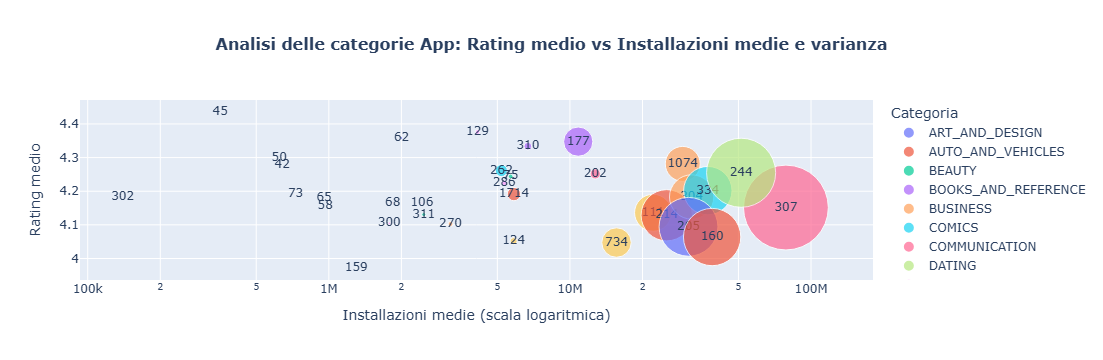

           Category  avg_rating  avg_installs  var_installs  count_apps
      COMMUNICATION        4.15   78671796.51  4.976584e+16         307
             SOCIAL        4.25   51286235.55  3.301790e+16         244
      VIDEO_PLAYERS        4.06   38886857.50  2.275949e+16         160
       PRODUCTIVITY        4.20   37314581.38  1.619334e+16         334
        PHOTOGRAPHY        4.18   31977773.45  1.357786e+16         304
   TRAVEL_AND_LOCAL        4.09   31033460.00  2.395141e+16         205
               GAME        4.28   29370449.46  8.442216e+15        1074
 NEWS_AND_MAGAZINES        4.13   25201451.64  1.816509e+16         214
      ENTERTAINMENT        4.14   22123063.06  9.468519e+15         111
              TOOLS        4.05   15600442.10  6.000949e+15         734
           SHOPPING        4.25   12739265.05  7.215640e+14         202
BOOKS_AND_REFERENCE        4.35   10826506.53  5.919902e+15         177
    PERSONALIZATION        4.33    6691461.06  4.135780e+14     

In [128]:
import plotly.express as px

# Ragruppo per categoria e calcolo le statistiche
df_grouped = df.groupby('Category').agg(
    avg_rating = ('Rating', 'mean'),
    avg_installs = ('Installs', 'mean'),
    var_installs = ('Installs', 'var'),
    count_apps = ('App', 'count')
).reset_index()

# Creo il grafico
fig = px.scatter(
    df_grouped,
    x='avg_installs',
    y='avg_rating',
    size='var_installs',
    color='Category',
    hover_name='Category',
    size_max=60,
    text='count_apps',
    title='Analisi delle categorie App: Rating medio vs Installazioni medie e varianza',
    labels={
        'avg_installs': 'Installazioni medie',
        'avg_rating': 'Rating medio',
        'var_installs': 'Varianza installazioni',
        'count_apps': 'Numero di app'
    },
    log_x=True # scala logaritmica sull'asse x (installazioni), utile se i valori sono molto dispersi
)


fig.update_layout(
    title={
        'text': "<b>Analisi delle categorie App: Rating medio vs Installazioni medie e varianza</b>",
        'font': {
            'size': 16
        },
        'x': 0.5 
    },
    xaxis=dict(title='Installazioni medie (scala logaritmica)'),
    yaxis=dict(title='Rating medio'),
    legend_title_text='Categoria'
)
fig.show()

# Stampo le statistiche con valori arrotondati e ordinati per installazioni medie decrescenti
df_print = df_grouped.copy()
df_print[['avg_rating', 'avg_installs', 'var_installs']] = df_print[['avg_rating', 'avg_installs', 'var_installs']].round(2)
df_print = df_print.sort_values(by='avg_installs', ascending=False)

print(df_print.to_string(index=False))

| Categoria             | Installazioni      | Rating | Varianza Installazioni | Numero App | Note                                 |
| --------------------- | ------------------ | ------ | ---------------------- | ---------- | ------------------------------------ |
| BOOKS\_AND\_REFERENCE | Alta (>10M)        | 4.35   | Media-bassa            | 177        | Buon equilibrio, stabile e qualità   |
| SHOPPING              | Alta (>10M)        | 4.25   | Bassa-moderata         | 202        | Mercato stabile ma competitivo       |
| GAME                  | Molto alta (\~13M) | 4.28   | Alta                   | 1074       | Mercato molto competitivo e volatile |
| PERSONALIZATION       | Media              | 4.33   | Molto bassa            | 310        | Mercato stabile e rating alto        |
| EDUCATION             | Media              | 4.38   | Bassa                  | 129        | Nicchia con alta qualità             |
| EVENTS                | Bassa              | 4.44   | Molto bassa            | 45         | Nicchia, meno concorrenza            |


-----
Il grafico mette a confronto tre dimensioni chiave per ciascuna categoria di app: il rating medio degli utenti, la media delle installazioni e la varianza delle installazioni, insieme al numero totale di app presenti in ogni categoria. Questa analisi offre una panoramica preziosa per valutare il potenziale commerciale e il comportamento di mercato delle diverse categorie di app.

Le categorie con le installazioni medie più elevate — come COMMUNICATION (circa 78 milioni) e SOCIAL (circa 51 milioni) — registrano anche un numero consistente di app (oltre 300 e 240 rispettivamente) e rating medi attorno a 4.15-4.25. Tuttavia, presentano una varianza elevata nelle installazioni, segnalando una forte disparità tra app molto popolari e altre meno installate. Questo indica un mercato altamente competitivo e frammentato, dove investire in innovazione e differenziazione può essere cruciale per emergere.

Categorie come PRODUCTIVITY e GAME mostrano rating medi superiori a 4.2, con un alto numero di app (oltre 300 e 1000 rispettivamente), a dimostrazione di una domanda stabile e un pubblico fidelizzato, con opportunità di monetizzazione e crescita sostenibile.

Le categorie con rating medi più alti come EVENTS (4.44) e BOOKS_AND_REFERENCE (4.35) hanno installazioni medie più contenute ma offrono un pubblico più di nicchia e fidelizzato, ideale per strategie mirate e partnership commerciali.

Categorie come MEDICAL e HEALTH_AND_FITNESS combinano un rating medio superiore a 4.1 con installazioni più contenute e una varianza molto più bassa, suggerendo un mercato più stabile e meno volatile, che può rappresentare un'opportunità solida per sviluppi orientati alla qualità e alla fiducia degli utenti.

Conclusione commerciale:
Questa analisi evidenzia come categorie con grandi volumi di installazioni abbiano mercati altamente dinamici ma frammentati, mentre settori con rating elevati e varianza più bassa rappresentano nicchie più stabili e potenzialmente più profittevoli per investimenti a lungo termine. Per strategie di sviluppo e marketing, è fondamentale bilanciare l’attenzione tra le categorie di massa, dove la concorrenza è feroce, e quelle di nicchia, dove la qualità e la fidelizzazione premiano maggiormente.

-----

# 6. Clustering K-Means

In [101]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [102]:
# Selezione delle variabili per il clustering
features = df[['Rating', 'Installs', 'Price_$', 'Category']].copy()

In [103]:
# Encoding delle variabili per categoria
le = LabelEncoder() # trasforma le categorie in numeri
features['Category'] = le.fit_transform(features['Category'])

In [104]:
# Normalizzazione variabili numeriche
scaler = StandardScaler() # rendere tutte le variabili con media 0 e deviazione standard 1.
scaler_features = scaler.fit_transform(features)

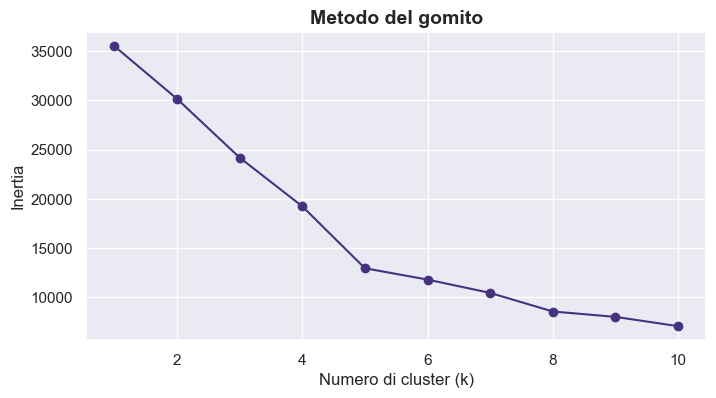

In [129]:
# Scegliere il numero di cluster: Metodo del gomito
inertia = []
K_range = range(1,11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaler_features)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inertia')
plt.title('Metodo del gomito',fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [106]:
# Esecuzione di K-Means con il numero ottimale di cluster
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaler_features)
df['Cluster'] = clusters

In [107]:
# Analisi dei cluster
df.groupby('Cluster')[['Rating', 'Installs', 'Price_$']].mean()

,Rating,Installs,Price_$
Cluster,,,
0,4.311467,1.432838e+07,0.199780
1,4.224194,2.501258e+04,17.101613
2,4.340670,1.125357e+07,0.180559
3,3.084121,6.841719e+05,0.172613
4,4.261224,1.000000e+09,0.000000


In [108]:
# Distribuzione delle categorie nei cluster
df.groupby('Cluster')['Category'].value_counts().head(100)

Cluster  Category           
0        TOOLS                   626
         PRODUCTIVITY            302
         PERSONALIZATION         293
         PHOTOGRAPHY             266
         SPORTS                  261
         MEDICAL                 227
         SOCIAL                  224
         SHOPPING                192
         TRAVEL_AND_LOCAL        174
         NEWS_AND_MAGAZINES      172
         VIDEO_PLAYERS           137
         MAPS_AND_NAVIGATION      92
         WEATHER                  74
         PARENTING                47
1        MEDICAL                  24
         FAMILY                   19
         GAME                      4
         BUSINESS                  3
         MAPS_AND_NAVIGATION       2
         PHOTOGRAPHY               2
         SPORTS                    2
         TOOLS                     2
         FINANCE                   1
         LIFESTYLE                 1
         PERSONALIZATION           1
         TRAVEL_AND_LOCAL          1
2        

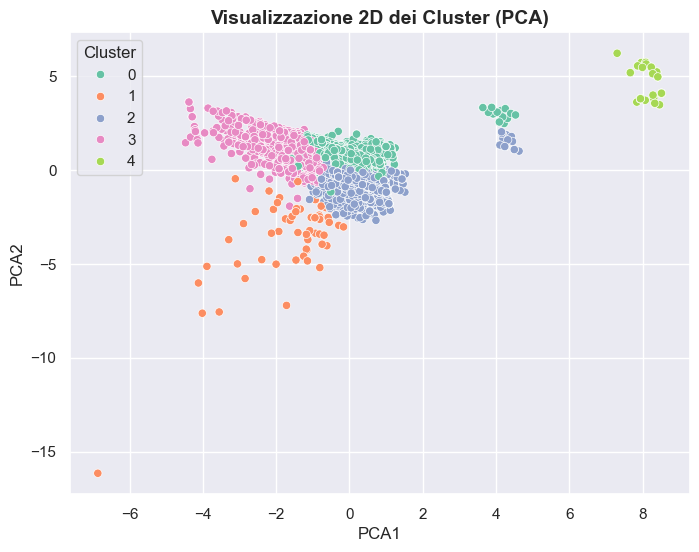

In [130]:
# Visualizzazione 2D con i primi due componenti
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaler_features)

df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Visualizzazione 2D dei Cluster (PCA)',fontsize=14, fontweight='bold')
plt.savefig("cluster_pca_plot.png", dpi=300, bbox_inches='tight')
plt.show()


## 🔍 Interpretazione dei Cluster

---

### 🟢 Cluster 0
- **Rating**: 4.31 → alto  
- **Installazioni medie**: 14.3 milioni → molto buone  
- **Prezzo medio**: 0.20 $ → quasi gratuito  
- **Categorie principali**:  
  TOOLS, PRODUCTIVITY, PERSONALIZATION, PHOTOGRAPHY  

> Dominano app funzionali e d’uso quotidiano

📌 **Insight**:  
App solide, molto diffuse, gratuite o quasi, con buona qualità percepita.  
Potrebbe essere competitivo, ma anche con una concorrenza elevata (es. TOOLS: 626 app).

---

### 🟡 Cluster 1
- **Rating**: 4.22 → buono  
- **Installazioni medie**: 25.000 → **bassissime**  
- **Prezzo medio**: 17.1 $ → **altissimo**  
- **Categorie principali**:  
  MEDICAL, FAMILY, BUSINESS, PHOTOGRAPHY  

> Spiccano app professionali e di nicchia

📌 **Insight**:  
App a pagamento, poco scaricate ma forse rivolte a mercati molto specifici  
(es. strumenti per medici o aziende).  
Da evitare se il tuo obiettivo è l’ampia diffusione.

---

### 🔵 Cluster 2
- **Rating**: 4.34 → **il più alto**  
- **Installazioni medie**: 11.2 milioni → alte  
- **Prezzo medio**: 0.18 $ → basso  
- **Categorie principali**:  
  FAMILY (1499), GAME (993), COMMUNICATION, EDUCATION, HEALTH  

> Settori ad alto coinvolgimento e grande volume

📌 **Insight**:  
Cluster con rating migliore, ottima diffusione e grande varietà.  
FAMILY, GAME, EDUCATION sono presenti con un numero altissimo di app.  
È un mercato molto competitivo, ma promettente.

---

### 🔴 Cluster 3
- **Rating**: 3.08 → **molto basso**  
- **Installazioni medie**: 684.000 → basse  
- **Prezzo medio**: 0.17 $ → basso  
- **Categorie principali**:  
  FAMILY, TOOLS, LIFESTYLE, MEDICAL  

> Ampia varietà ma qualità percepita bassa

📌 **Insight**:  
Cluster debole. Rating basso e installazioni scarse.  
Probabilmente include molte app non curate o abbandonate.  
**Da evitare**.

---

### 🟣 Cluster 4
- **Rating**: 4.26 → buono  
- **Installazioni medie**: **1 miliardo!** (outlier probabile)  
- **Prezzo medio**: 0 $ → completamente gratuito  
- **Categorie principali**:  
  COMMUNICATION, SOCIAL, GAME, TRAVEL  

> App enormi come WhatsApp, Facebook, TikTok

📌 **Insight**:  
Cluster delle **big tech app**: elevata qualità, popolarità stratosferica,  
ma **fuori portata per piccoli sviluppatori**.  
Non è un target realistico, ma è utile **confrontarsi**.


## 📊 Riepilogo Cluster

| Cluster | Rating Medio | Installs Medi | Prezzo Medio | Note                                  |
|--------:|:-------------|:--------------|:-------------|:---------------------------------------|
| 0       | 4.31         | 14M           | 0.20 €       | Molte categorie, stabile               |
| 1       | 4.22         | 25K           | 17 €         | App a pagamento                        |
| 2       | 4.34         | 11M           | 0.18 €       | Molte app, include FAMILY e GAME       |
| 3       | 3.08         | 684K          | 0.17 €       | Rating più basso                       |
| 4       | 4.26         | 1 miliardo    | 0.00 €       | Poche app, molto popolari              |

---

## 🔎 Osservazioni Strategiche

- 🟢 **Cluster 4** è **isolato**: app gratuite e altissimo numero di installazioni.  
  → **Interessante per popolarità**, ma difficile da raggiungere per piccoli sviluppatori.

- 🟣 **Cluster 2** è **centrale e grande**: potrebbe essere un mercato **saturo**, ma anche **stabile e ricco di app**.  
  → Buon compromesso tra visibilità, rating e varietà.

- 🟠 **Cluster 1** è **sparso e distaccato**: app a pagamento, con **bassa installazione**  
  → Target di **nicchia** o **poco interessante** se si punta alla diffusione.



# 7. Sintesi e Strategia Finale

## 🎯 Obiettivi Strategici

🔍 **Cosa cerchi dalla tua app?**

- Vuoi **alta visibilità e diffusione**?  
  → **Cluster 0** e **Cluster 2** sono i migliori candidati: milioni di installazioni, buon rating, prezzo basso.

- Vuoi **massimizzare la qualità percepita**?  
  → **Cluster 2** ha il rating medio più alto (4.34) ed è ben rappresentato da categorie come FAMILY, EDUCATION, GAME.

- Vuoi **un mercato stabile con meno concorrenza**?  
  → Evita Cluster 2 e 0 (molto affollati).  
  → Valuta **Cluster 1** per app premium di nicchia oppure **categorie** come EDUCATION, BOOKS_AND_REFERENCE, EVENTS: buona qualità e meno saturazione.

---

## 🧭 Conclusione Pratica

🔹 **Categoria suggerita**: `BOOKS_AND_REFERENCE`

### ✅ Perché?

- Appartenente al **Cluster 2** → ottimo compromesso tra **rating elevato** e **buon volume di installazioni**.
- È tra le **categorie con minor varianza e buona stabilità**, quindi **meno volatile e più prevedibile**.
- Nella precedente analisi di categoria risulta:  
  > _"Buon equilibrio, stabile e qualità"_ con installazioni alte (>10M) e rating medio 4.35.
- **Meno affollata** rispetto a FAMILY o GAME (177 app), ma comunque visibile e apprezzata.
- **Adatta a progetti educativi, informativi, culturali o legati all'economia circolare** — come lo scambio di libri, la vendita di testi usati o la promozione della lettura sostenibile. Ottimo potenziale di impatto e monetizzazione indiretta.


📌 **Sintesi**:  
BOOKS_AND_REFERENCE offre un **posizionamento favorevole**: è un segmento **di qualità**, con **buona visibilità** e **meno pressione competitiva** rispetto ai giganti del mercato.

